In [1]:
import numpy as np
import math
import pandas as pd

from plotnine import *

/home/chris/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def our_boundary(per, amp_i):
    return amp_i > 0.179678 + 0.000000 + -85.279697 * per + 147.100499 * per ** 2 + -88.072173 * per ** 3

def szczygiel_boundary(log_per, amp_v):
    return amp_v > -8.0 * log_per - 0.85

In [3]:
test_data = pd.read_csv("~/Datasets/rrab_oosterhoff/combined.csv")
test_data = test_data.dropna()

test_data

,id,period,I_amp,V_amp,cluster,paper,oost_group
2,V5,0.515300,0.437,1.271,omega_cen,Braga 2016,Many?
5,V9,0.523500,0.516,1.170,omega_cen,Braga 2016,Many?
6,V11,0.564800,0.576,1.017,omega_cen,Braga 2016,Many?
15,V32,0.620400,0.801,1.242,omega_cen,Braga 2016,Many?
29,V56,0.568000,0.507,1.117,omega_cen,Braga 2016,Many?
31,V59,0.518500,0.573,1.140,omega_cen,Braga 2016,Many?
34,V67,0.564500,0.700,1.074,omega_cen,Braga 2016,Many?
37,V74,0.503200,0.644,1.253,omega_cen,Braga 2016,Many?
51,V106,0.569900,0.804,1.282,omega_cen,Braga 2016,Many?
56,V112,0.474400,0.674,1.160,omega_cen,Braga 2016,Many?


In [4]:
test_data = test_data[test_data["oost_group"].isin(["I", "II"])]

test_data

,id,period,I_amp,V_amp,cluster,paper,oost_group
86,V6,0.666000,0.54,0.94,M15,Corwin 2008,II
87,V8,0.646200,0.51,0.89,M15,Corwin 2008,II
88,V9,0.715295,0.79,0.84,M15,Corwin 2008,II
89,V13,0.574910,0.65,1.01,M15,Corwin 2008,II
90,V19,0.572300,0.90,1.38,M15,Corwin 2008,II
91,V20,0.697021,0.42,0.90,M15,Corwin 2008,II
92,V21,0.647600,0.49,0.85,M15,Corwin 2008,II
93,V32,0.604400,0.64,0.97,M15,Corwin 2008,II
94,V33,0.583945,0.68,1.05,M15,Corwin 2008,II
95,V36,0.624151,0.59,0.93,M15,Corwin 2008,II


/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


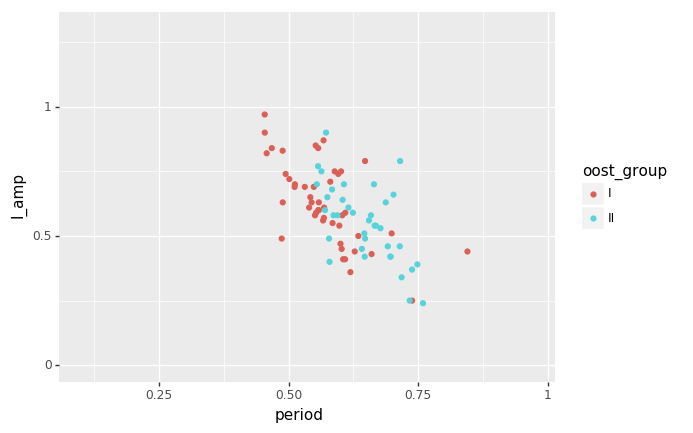

<ggplot: (8740881113264)>

In [10]:
ggplot(test_data, aes("period", "I_amp", color="oost_group")) + \
    geom_point() +\
    xlim(0.1, 0.97) +\
    ylim(0, 1.3)

In [6]:
data_array = test_data.as_matrix(["period", "I_amp", "V_amp"])

our_labels = [our_boundary(row[0], row[1]) for row in data_array]
test_data["our_label"] = our_labels

szczygiel_labels = [szczygiel_boundary(math.log10(row[0]), row[2]) for row in data_array]
test_data["szczygiel_label"] = szczygiel_labels

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


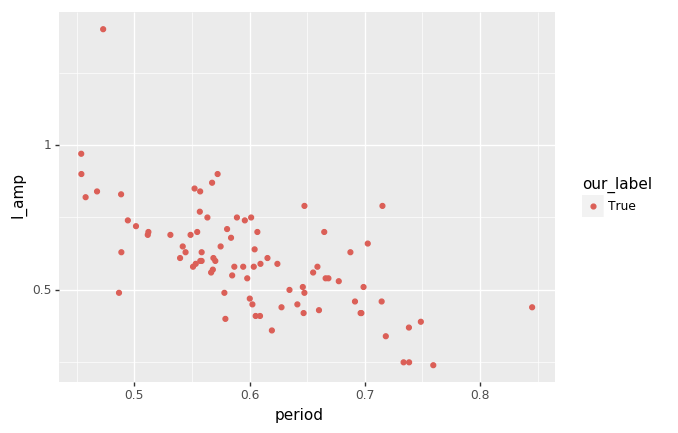

<ggplot: (-9223363295973670754)>

In [7]:
ggplot(test_data, aes("period", "I_amp", color="our_label")) + geom_point()

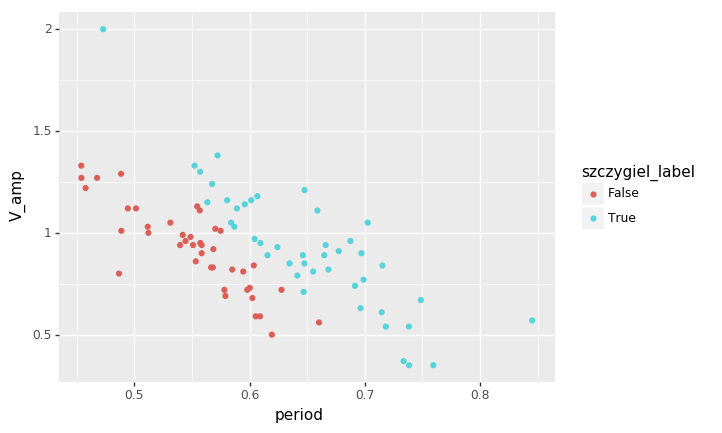

<ggplot: (-9223363295973611092)>

In [8]:
ggplot(test_data, aes("period", "V_amp", color="szczygiel_label")) + geom_point()